In [2]:
common_path = "/export/c09/lavanya/merlion_data/MERLIon-CCS-Challenge_Development-Set_v001/_CONFIDENTIAL/"


In [2]:
import torch

# Path to the checkpoint
checkpoint_path = "/export/c09/lavanya/languageIdentification/merlion/large/testcheck/Layer_3/model_best.pth"

# Load the checkpoint
checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))

# Inspect the contents
print("Checkpoint keys:", checkpoint.keys())

# Check if the checkpoint contains model state_dict
if 'model_state_dict' in checkpoint:
    print("\nModel State Dict Keys:")
    for key in checkpoint['model_state_dict']:
        print(key)

# Check optimizer state_dict if present
if 'optimizer_state_dict' in checkpoint:
    print("\nOptimizer State Dict Keys:")
    for key in checkpoint['optimizer_state_dict']:
        print(key)

# Check other metadata
for key, value in checkpoint.items():
    if key not in ['model_state_dict', 'optimizer_state_dict']:
        print(f"\nKey: {key}, Value: {value}")


/home/lshankar1/miniconda3/envs/capstone/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


FileNotFoundError: [Errno 2] No such file or directory: '/export/c09/lavanya/languageIdentification/merlion/large/testcheck/Layer_3/model_best.pth'

In [2]:

import os
from lhotse import RecordingSet, load_manifest

audio_folder = common_path + '_audio'

# Create a RecordingSet from the audio folder
recording_set = RecordingSet.from_dir(audio_folder, pattern='*.wav')

# Calculate durations of each recording and total duration
durations = [recording.duration for recording in recording_set]
total_seconds = sum(durations)

# Convert total duration to hours
total_minutes = total_seconds / 60
total_hours = total_minutes / 60

# Print results
print(f"Number of .wav files: {len(recording_set)}")
print("Duration of each .wav file (in minutes):")
for recording in recording_set:
    print(f"{recording.id}: {recording.duration / 60:.2f} minutes")
print(f"Total hours of audio: {total_hours:.2f} hours")

/home/lshankar1/miniconda3/envs/capstone/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Scanning audio files (*.wav): 151it [00:01, 89.91it/s] 

Number of .wav files: 151
Duration of each .wav file (in minutes):
TTS_P10040TT_VCST_ECxxx_01_AO_35259847_v001_R004_CRR_MERLIon-CCS: 10.20 minutes
TTS_P35682TT_VCST_ECxxx_02_AO_45258424_v001_R011_CRR_MERLIon-CCS: 13.78 minutes
TTS_P36907TT_VCST_ECxxx_02_AO_64947358_v001_R011_CRR_MERLIon-CCS: 9.48 minutes
TTS_P42483TT_VCST_ECxxx_03_AO_90123090_v001_R011_CRR_MERLIon-CCS: 21.83 minutes
TTS_P11893TT_VCST_ECxxx_01_AO_59008458_v001_R004_CRR_MERLIon-CCS: 11.50 minutes
TTS_P17982TT_VCST_ECxxx_02_AO_23220579_v001_R007_CRR_MERLIon-CCS: 17.92 minutes
TTS_P31427TT_VCST_ECxxx_03_AO_73277939_v001_R011_CRR_MERLIon-CCS: 7.07 minutes
TTS_P36384TT_VCST_ECxxx_02_AO_57022465_v001_R003_CRR_MERLIon-CCS: 9.83 minutes
TTS_P36907TT_VCST_ECxxx_01_AO_78388818_v001_R011_CRR_MERLIon-CCS: 6.00 minutes
TTS_P26838TT_VCST_ECxxx_03_AO_38621781_v001_R007_CRR_MERLIon-CCS: 22.85 minutes
TTS_P36907TT_VCST_ECxxx_03_AO_42904488_v001_R011_CRR_MERLIon-CCS: 9.07 minutes
TTS_P25496TT_VCST_ECxxx_03_AO_76210687_v001_R004_CRR_MERLI

### CSV file understanding

In [3]:
import pandas as pd

In [4]:
csv_path = common_path + '_labels/_MERLIon-CCS-Challenge_Development-Set_Language-Labels_v001.csv'
df1 = pd.read_csv(csv_path)

In [5]:
df1.head()
pd.set_option('display.max_colwidth', 100)

In [6]:
df1.head()

,audio_name,utt_id,start,end,length,language_tag,overlap_diff_lang,dev_eval_status
0,TTS_P91182TT_VCST_ECxxx_01_AO_48503281_v001_R004_CRR_MERLIon-CCS.wav,a1,1170,2750,1580,English,False,dev
1,TTS_P91182TT_VCST_ECxxx_01_AO_48503281_v001_R004_CRR_MERLIon-CCS.wav,a4,3000,6190,3190,English,False,dev
2,TTS_P91182TT_VCST_ECxxx_01_AO_48503281_v001_R004_CRR_MERLIon-CCS.wav,a8,6820,7840,1020,English,False,dev
3,TTS_P91182TT_VCST_ECxxx_01_AO_48503281_v001_R004_CRR_MERLIon-CCS.wav,a11,7875,9035,1160,English,False,dev
4,TTS_P91182TT_VCST_ECxxx_01_AO_48503281_v001_R004_CRR_MERLIon-CCS.wav,a14,9350,12830,3480,English,False,dev


In [7]:
df1.shape

# total 8 columns

(60376, 8)

In [8]:

unique_counts = df1.nunique()

# Display the number of unique values for each column
print("Number of unique values in each column:")
print(unique_counts)


Number of unique values in each column:
audio_name             151
utt_id                3635
start                58077
end                  57977
length                4973
language_tag             4
overlap_diff_lang        2
dev_eval_status          1
dtype: int64


In [8]:
for column_index in [5,6,7]:
    unique_counts = df1.iloc[:, column_index].value_counts()
    print(f"Unique value counts in column '{column_index}':")
    print(unique_counts)
    print()

Unique value counts in column '5':
language_tag
English          40287
NON_SPEECH       10090
Mandarin          9983
NON_EVAL_LANG       16
Name: count, dtype: int64

Unique value counts in column '6':
overlap_diff_lang
False    59778
True       598
Name: count, dtype: int64

Unique value counts in column '7':
dev_eval_status
dev    60376
Name: count, dtype: int64



In [9]:
print(df1['language_tag'].unique())

['English' 'NON_SPEECH' 'Mandarin' 'NON_EVAL_LANG']


In [10]:
#mandarin_rows = df1[df1['language_tag'] == 'Mandarin']
mandarin_or_english_row = df1[(df1['language_tag'].isin(['Mandarin', 'English']))]

mandarin_or_english_row.head()

,audio_name,utt_id,start,end,length,language_tag,overlap_diff_lang,dev_eval_status
0,TTS_P91182TT_VCST_ECxxx_01_AO_48503281_v001_R004_CRR_MERLIon-CCS.wav,a1,1170,2750,1580,English,False,dev
1,TTS_P91182TT_VCST_ECxxx_01_AO_48503281_v001_R004_CRR_MERLIon-CCS.wav,a4,3000,6190,3190,English,False,dev
2,TTS_P91182TT_VCST_ECxxx_01_AO_48503281_v001_R004_CRR_MERLIon-CCS.wav,a8,6820,7840,1020,English,False,dev
3,TTS_P91182TT_VCST_ECxxx_01_AO_48503281_v001_R004_CRR_MERLIon-CCS.wav,a11,7875,9035,1160,English,False,dev
4,TTS_P91182TT_VCST_ECxxx_01_AO_48503281_v001_R004_CRR_MERLIon-CCS.wav,a14,9350,12830,3480,English,False,dev


In [11]:
mandarin_or_english_row.shape

(50270, 8)

In [12]:
#mandarin_rows = df1[df1['language_tag'] == 'Mandarin']
mandarin_or_english_rows = df1[(df1['language_tag'].isin(['Mandarin', 'English'])) & (df1['overlap_diff_lang'] == False)]

mandarin_or_english_rows.head()

,audio_name,utt_id,start,end,length,language_tag,overlap_diff_lang,dev_eval_status
0,TTS_P91182TT_VCST_ECxxx_01_AO_48503281_v001_R004_CRR_MERLIon-CCS.wav,a1,1170,2750,1580,English,False,dev
1,TTS_P91182TT_VCST_ECxxx_01_AO_48503281_v001_R004_CRR_MERLIon-CCS.wav,a4,3000,6190,3190,English,False,dev
2,TTS_P91182TT_VCST_ECxxx_01_AO_48503281_v001_R004_CRR_MERLIon-CCS.wav,a8,6820,7840,1020,English,False,dev
3,TTS_P91182TT_VCST_ECxxx_01_AO_48503281_v001_R004_CRR_MERLIon-CCS.wav,a11,7875,9035,1160,English,False,dev
4,TTS_P91182TT_VCST_ECxxx_01_AO_48503281_v001_R004_CRR_MERLIon-CCS.wav,a14,9350,12830,3480,English,False,dev


In [ ]:
mandarin_or_english_rows.shape

(49672, 8)

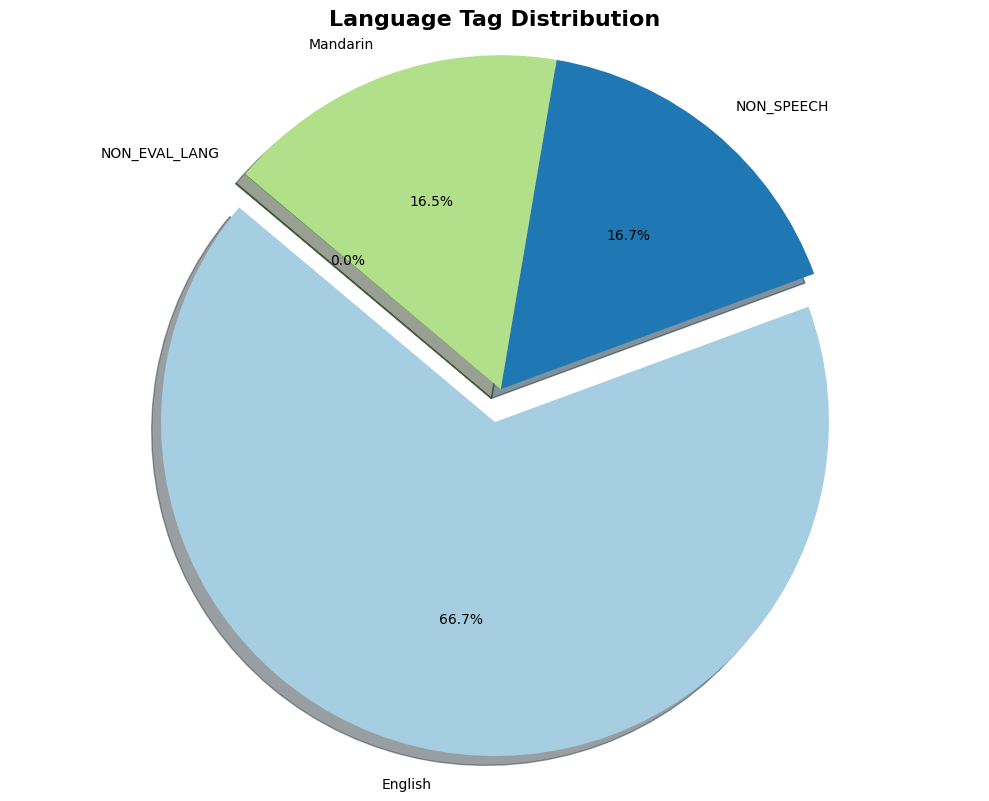

In [13]:
 
import matplotlib.pyplot as plt

# Get language tags from the DataFrame
language_tags = df1['language_tag']

# Count occurrences of each language tag
tag_counts = language_tags.value_counts()

# Define colors for the pie chart
colors = plt.cm.Paired(range(len(tag_counts)))  # Use a colormap to generate a range of colors

# Define explode for slices
explode = [0.1] + [0] * (len(tag_counts) - 1)  # Explode the first slice, others are zero

# Plotting
plt.figure(figsize=(10, 8))
plt.pie(tag_counts, labels=tag_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)
plt.title('Language Tag Distribution', fontsize=16, fontweight='bold')  # Add title with custom font size and weight
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


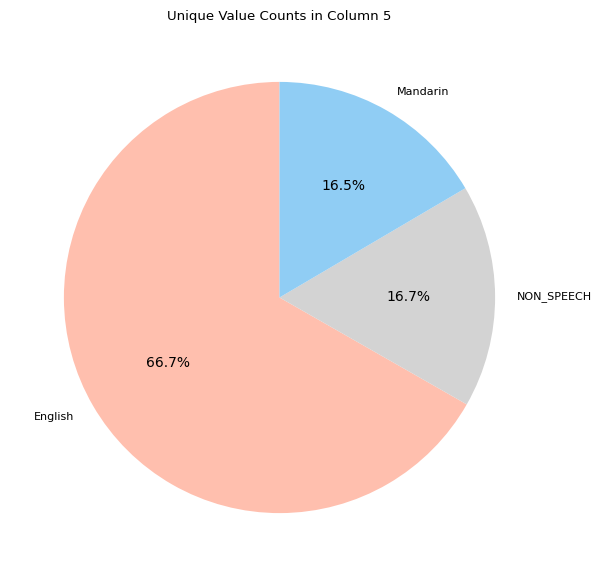

In [32]:
import matplotlib.pyplot as plt

columns = [5]

# Define a custom color palette with blue and contrasting colors like pink
colors = ['#ffbfae', '#D3D3D3','#90cdf4']

# Plotting
for column_index in columns:
    # Get the value counts and filter out 'NON_EVAL_LANG'
    unique_counts = df1.iloc[:, column_index].value_counts()
    unique_counts = unique_counts[unique_counts.index != 'NON_EVAL_LANG']
    
    # Create a pie chart for the value counts with custom colors
    plt.figure(figsize=(7, 7))
    plt.pie(unique_counts, labels=unique_counts.index, autopct='%1.1f%%', startangle=90, colors=colors[:len(unique_counts)])
    plt.title(f"Unique Value Counts in Column {column_index}")
    plt.show()


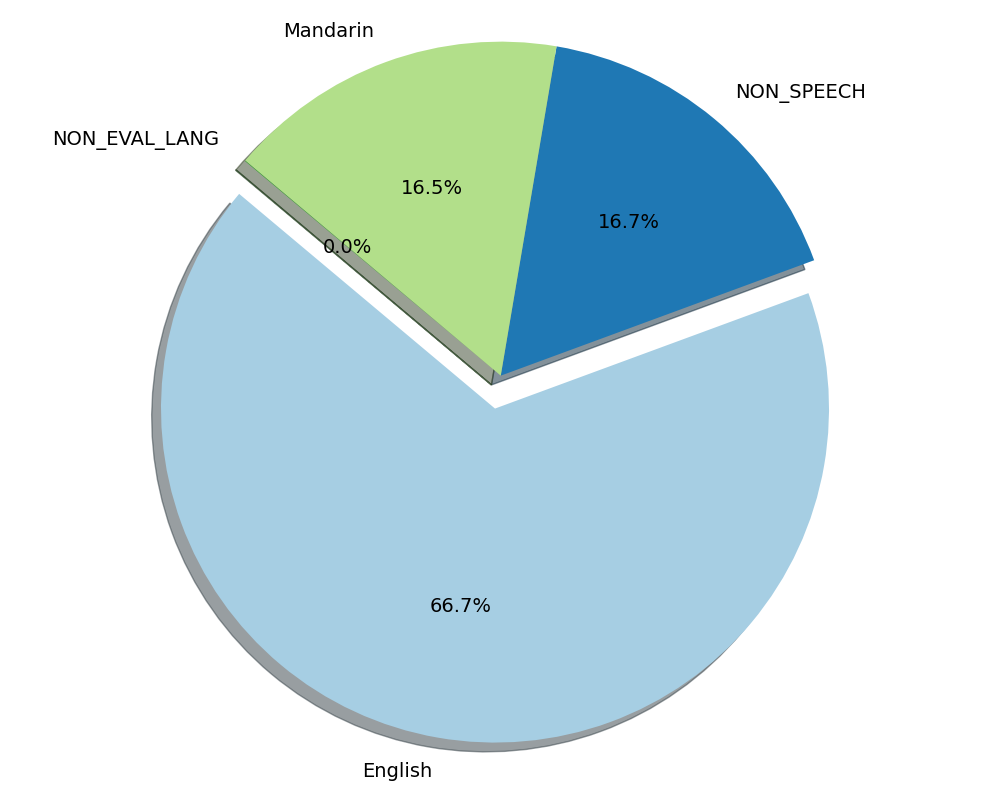

In [10]:
import matplotlib.pyplot as plt

# Get language tags from the DataFrame
language_tags = df1['language_tag']

# Count occurrences of each language tag
tag_counts = language_tags.value_counts()

# Define colors for the pie chart
colors = plt.cm.Paired(range(len(tag_counts)))  # Use a colormap to generate a range of colors
# Define explode for slices
explode = [0.1] + [0] * (len(tag_counts) - 1)  # Explode the first slice, others are zero

# Plotting
plt.figure(figsize=(10, 8))
plt.pie(tag_counts, 
        labels=tag_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors, 
        explode=explode, 
        shadow=True, 
        textprops={'fontsize': 14})  # Increase font size for the text

#plt.title('Language Tag Distribution', fontsize=16, fontweight='bold')  # Add title with custom font size and weight
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


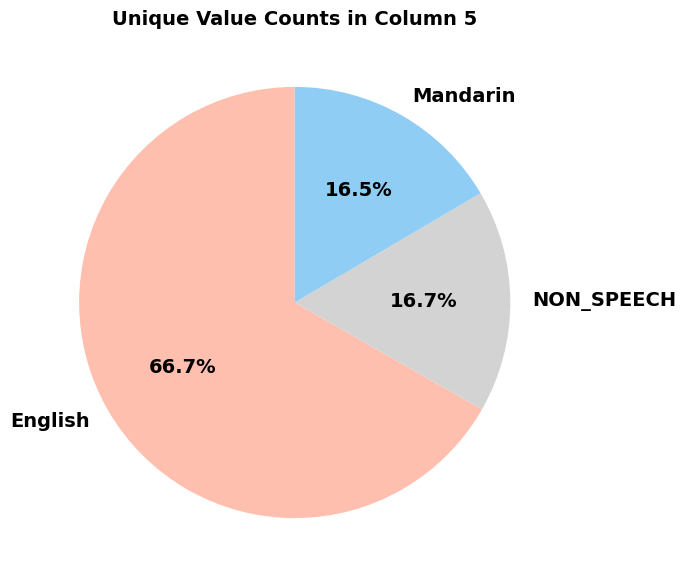

In [33]:
import matplotlib.pyplot as plt

columns = [5]

# Define a custom color palette with blue and contrasting colors like pink
colors = ['#ffbfae', '#D3D3D3','#90cdf4']

# Plotting
for column_index in columns:
    # Get the value counts and filter out 'NON_EVAL_LANG'
    unique_counts = df1.iloc[:, column_index].value_counts()
    unique_counts = unique_counts[unique_counts.index != 'NON_EVAL_LANG']
    
    # Create a pie chart for the value counts with custom colors
    plt.figure(figsize=(7, 7))
    wedges, texts, autotexts = plt.pie(
        unique_counts, 
        labels=unique_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=colors[:len(unique_counts)]
    )
    
    # Bold the title with a larger font size
    plt.title(f"Unique Value Counts in Column {column_index}", fontweight='bold', fontsize=14)
    
    # Bold the labels and the percentages with larger font size
    for text in texts + autotexts:
        text.set_fontweight('bold')
        text.set_fontsize(14)  # Set label font size
    
    # Increase the font size of the percentages
    for autotext in autotexts:
        autotext.set_fontsize(14)  # Set percentage font size
    
    plt.show()


# XLS file

In [21]:

# this xlsx file has all 151 audio files present in the audio directory 
# xlsx file as the 151 file name and size

# Define specific file paths using the common path
input_file = common_path + "MERLIon-CCS-Challenge-2023_Development-Set_v001_FileList.xlsx"
output_file = common_path + "tocsv.csv"

# Function to convert Excel to CSV
def xlsx_to_csv(input_file, output_file):
    df = pd.read_excel(input_file, engine='openpyxl')
    df.to_csv(output_file, index=False)

# Call the function to convert Excel to CSV
xlsx_to_csv(input_file, output_file)

# Read the CSV file into a DataFrame
xdf = pd.read_csv(output_file)

# Display the first few rows of the DataFrame
xdf.head()


,Size,AudioFilename
0,39168078,TTS_P10040TT_VCST_ECxxx_01_AO_35259847_v001_R004_CRR_MERLIon-CCS.wav
1,61376078,TTS_P10040TT_VCST_ECxxx_02_AO_75574514_v001_R004_CRR_MERLIon-CCS.wav
2,57472078,TTS_P10040TT_VCST_ECxxx_03_AO_70831925_v001_R011_CRR_MERLIon-CCS.wav
3,27968078,TTS_P11137TT_VCST_ECxxx_01_AO_22759572_v001_R011_CRR_MERLIon-CCS.wav
4,34944078,TTS_P11137TT_VCST_ECxxx_02_AO_46732177_v001_R011_CRR_MERLIon-CCS.wav


In [15]:
xdf.shape

(151, 2)

# Compare XLS and CSV

In [17]:
import pandas as pd

# Assuming df1 and xdf are already defined DataFrames

# Check for common audio filenames
common_audio_filenames = set(df1['audio_name']).intersection(xdf['AudioFilename'])

print("Number of common audio filenames:", len(common_audio_filenames))

if common_audio_filenames:
    first_matched_audio_filename = next(iter(common_audio_filenames))
    print("First matched audio filename:", first_matched_audio_filename)
    
    # Create corresponding DataFrame for df1
    corr_df1 = df1[df1['audio_name'] == first_matched_audio_filename].copy()
    
    # Create corresponding DataFrame for xdf
    corr_xdf = xdf[xdf['AudioFilename'] == first_matched_audio_filename].copy()
    
    # Optionally, print the DataFrames for verification
    print("DataFrame for df1 with the matched audio filename:")
    print(corr_df1)
    print("\nDataFrame for xdf with the matched audio filename:")
    print(corr_xdf)
    
else:
    print("No common audio filenames found.")


Number of common audio filenames: 151
First matched audio filename: TTS_P27727TT_VCST_ECxxx_02_AO_47085419_v001_R007_CRR_MERLIon-CCS.wav
DataFrame for df1 with the matched audio filename:
                                                                 audio_name  \
33037  TTS_P27727TT_VCST_ECxxx_02_AO_47085419_v001_R007_CRR_MERLIon-CCS.wav   
33038  TTS_P27727TT_VCST_ECxxx_02_AO_47085419_v001_R007_CRR_MERLIon-CCS.wav   
33039  TTS_P27727TT_VCST_ECxxx_02_AO_47085419_v001_R007_CRR_MERLIon-CCS.wav   
33040  TTS_P27727TT_VCST_ECxxx_02_AO_47085419_v001_R007_CRR_MERLIon-CCS.wav   
33041  TTS_P27727TT_VCST_ECxxx_02_AO_47085419_v001_R007_CRR_MERLIon-CCS.wav   
...                                                                     ...   
33948  TTS_P27727TT_VCST_ECxxx_02_AO_47085419_v001_R007_CRR_MERLIon-CCS.wav   
33949  TTS_P27727TT_VCST_ECxxx_02_AO_47085419_v001_R007_CRR_MERLIon-CCS.wav   
33950  TTS_P27727TT_VCST_ECxxx_02_AO_47085419_v001_R007_CRR_MERLIon-CCS.wav   
33951  TTS_P27727TT_VC

In [18]:
corr_df1.head(10)

,audio_name,utt_id,start,end,length,language_tag,overlap_diff_lang,dev_eval_status
33037,TTS_P27727TT_VCST_ECxxx_02_AO_47085419_v001_R007_CRR_MERLIon-CCS.wav,a21,0,3690,3690,English,False,dev
33038,TTS_P27727TT_VCST_ECxxx_02_AO_47085419_v001_R007_CRR_MERLIon-CCS.wav,a2631,4955,5745,790,English,False,dev
33039,TTS_P27727TT_VCST_ECxxx_02_AO_47085419_v001_R007_CRR_MERLIon-CCS.wav,a2632,6154,6717,563,English,False,dev
33040,TTS_P27727TT_VCST_ECxxx_02_AO_47085419_v001_R007_CRR_MERLIon-CCS.wav,a1,6170,7580,1410,English,False,dev
33041,TTS_P27727TT_VCST_ECxxx_02_AO_47085419_v001_R007_CRR_MERLIon-CCS.wav,a2633,7805,8540,735,English,False,dev
33042,TTS_P27727TT_VCST_ECxxx_02_AO_47085419_v001_R007_CRR_MERLIon-CCS.wav,a2634,8760,10064,1304,English,False,dev
33043,TTS_P27727TT_VCST_ECxxx_02_AO_47085419_v001_R007_CRR_MERLIon-CCS.wav,a2,10185,10945,760,English,False,dev
33044,TTS_P27727TT_VCST_ECxxx_02_AO_47085419_v001_R007_CRR_MERLIon-CCS.wav,a7,11110,13970,2860,English,False,dev
33045,TTS_P27727TT_VCST_ECxxx_02_AO_47085419_v001_R007_CRR_MERLIon-CCS.wav,a8,14520,15390,870,English,False,dev
33046,TTS_P27727TT_VCST_ECxxx_02_AO_47085419_v001_R007_CRR_MERLIon-CCS.wav,a9,17155,18195,1040,English,False,dev


In [19]:
corr_xdf.head()

,Size,AudioFilename
30,119680078,TTS_P27727TT_VCST_ECxxx_02_AO_47085419_v001_R007_CRR_MERLIon-CCS.wav
